# t-SNE for Manifold Learning

## Manifold Learning

Manifold learning is a class of unsupervised estimators that seeks to describe datasets as low-dimensional manifolds embedded in high-dimensional spaces.

- Manifold learning algorithms are mainly used for visualization.
- Don't allow transformations of new data -> can't be used for preprocessing.

### Key Concepts

- **Manifold**: A manifold is a topological space that locally resembles Euclidean space near each point. In other words, a manifold is a continuous space that can be bent and twisted, but it is not torn or punctured.

- **Manifold Hypothesis**: The manifold hypothesis states that real-world high-dimensional data lies on a low-dimensional manifold. This means that the data can be represented in a lower-dimensional space without losing important information.

- **Local vs Global Structure**: Manifold Learning algorithms focus on preserving the local neighborhood structure of data points, which can reveal the intrinsic geometry of the data manifold. Some algorithms also consider the global structure to maintain the overall relationships between data points.

- **Non-Linear Dimensionality Reduction**: Manifold learning techniques are used for non-linear dimensionality reduction, which means that they can capture complex relationships in the data that linear methods like PCA cannot.

## t-SNE (t-Distributed Stochastic Neighbor Embedding)

t-SNE is a popular manifold learning technique used for visualizing high-dimensional data in a low-dimensional space.

- t-SNE is a non-linear dimensionality reduction technique that focuses on preserving the local structure of the data.
- t-SNE is particularly good at capturing the underlying structure of complex datasets and revealing clusters or groups of data points.

### Key Features of t-SNE

- **Local Preservation**: t-SNE tries to preserve the local neighborhood relationships between data points in the high-dimensional space.
- **Non-Linear Embedding**: t-SNE captures complex patterns and relationships in the data by using a non-linear mapping function.
- **Clustering**: t-SNE is effective at revealing clusters or groups of data points in the low-dimensional space.
- **Sensitivity to Perplexity**: The perplexity parameter in t-SNE controls the number of nearest neighbors that is used in the algorithm. It can have a significant impact on the resulting visualization.
- **Random Initialization**: t-SNE uses random initialization of the low-dimensional embeddings, which can lead to different results on each run.

### How t-SNE Works

1. **Similarity Calculation**:
- Calculates pairwise similarities between data points in the high-dimensional space.
- Uses a Gaussian kernel to compute the conditional probability that two points would be neighbors.
$$
p_{j|i} = \frac{exp(-||x_i - x_j||^2 / 2\sigma_i^2)}{\sum_{k \neq i} exp(-||x_i - x_k||^2 / 2\sigma_i^2)}
$$
where:
- $p_{j|i}$ is the conditional probability that point $x_i$ would pick $x_j$ as its neighbor.
- $\sigma_i$ is the variance of the Gaussian kernel for point $x_i$.

2. **Similarity Measurement**:
- Measures the similarity between the low-dimensional data points using a Student's t-distribution.
$$
q_{j|i} = \frac{(1 + ||y_i - y_j||^2)^{-1}}{\sum_{k \neq i} (1 + ||y_i - y_k||^2)^{-1}}
$$
where:
- $q_{j|i}$ is the conditional probability that point $y_i$ would pick $y_j$ as its neighbor.

3. **Optimization**:
- Minimizes the Kullback-Leibler divergence between the two distributions.
$$
KL(P||Q) = \sum_i \sum_j p_{j|i} log \frac{p_{j|i}}{q_{j|i}}
$$
- Uses gradient descent to find the optimal low-dimensional representation of the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import mglearn

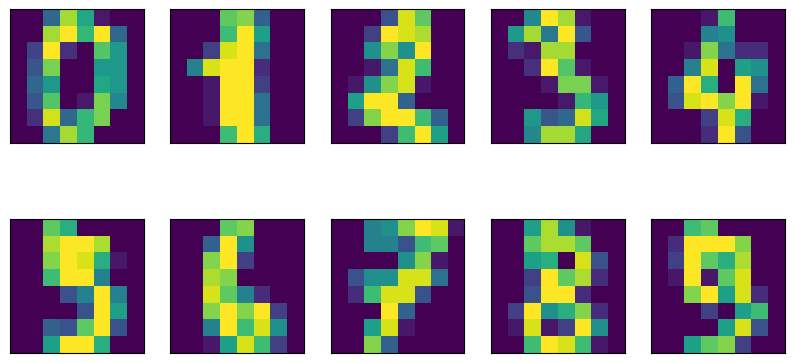

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks': (), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0, 0.5, 'Second principal component')

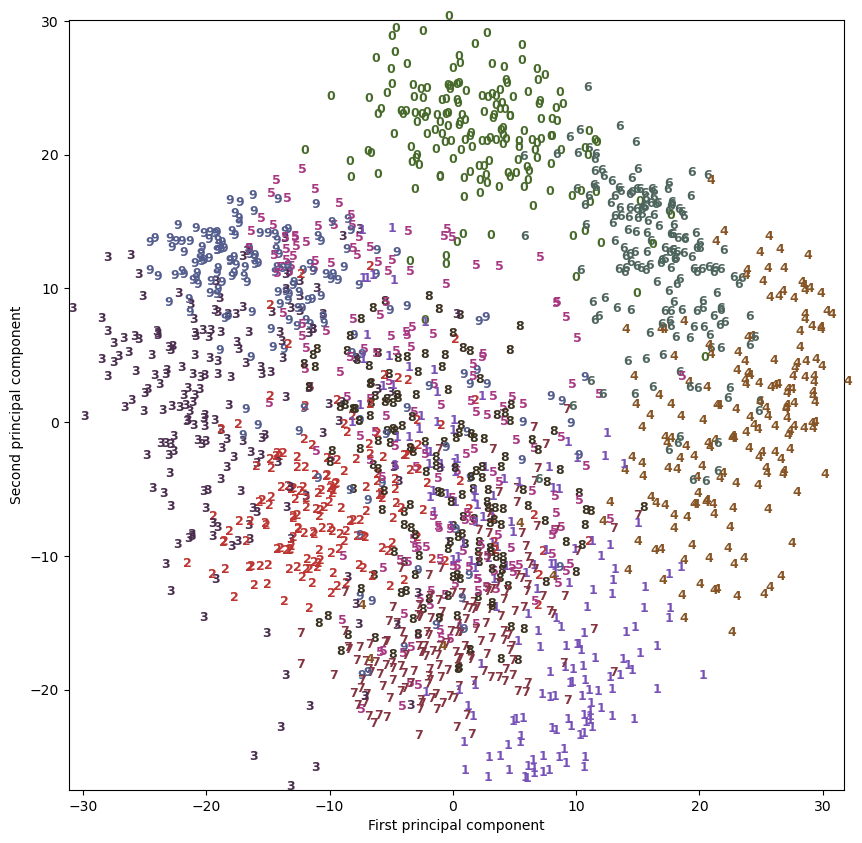

In [3]:
# build a PCA model
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(digits.data)
# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

PCA using the first two principal components.
- Most of the digits are mixed up and not clearly separated.

In [4]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)

Text(0, 0.5, 't-SNE feature 1')

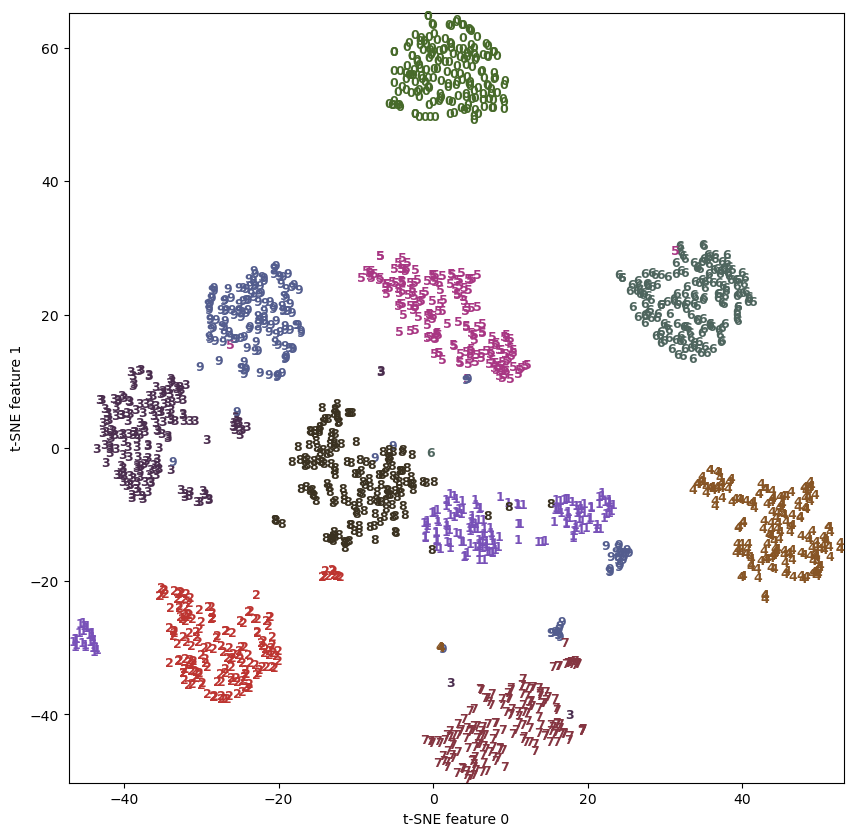

In [5]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

t-SNE
- The digits are clearly separated and form distinct clusters.